In [1]:
import matplotlib.pyplot as plt

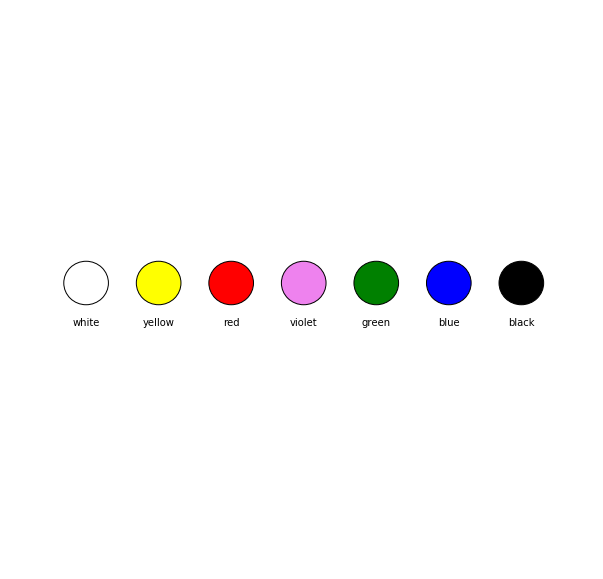

In [115]:
# Aristotelēs color palette
# Four elements: water, air, earth, and fire
# white, yellow, red, violet, green, blue, black

s = 10  # figsize
x = x*.1  # x location
r = 0.04  # radius

fig, ax = plt.subplots(figsize=(s, s))

colors = ['white', 'yellow', 'red', 'violet', 'green', 'blue', 'black']

for c in colors:
    ax.add_artist(plt.Circle((x, .5), r, facecolor=c, edgecolor='black'))
    ax.annotate(c, (x, .42), ha='center')
    x+=.13  #shift x location

plt.axis('off')
plt.show()

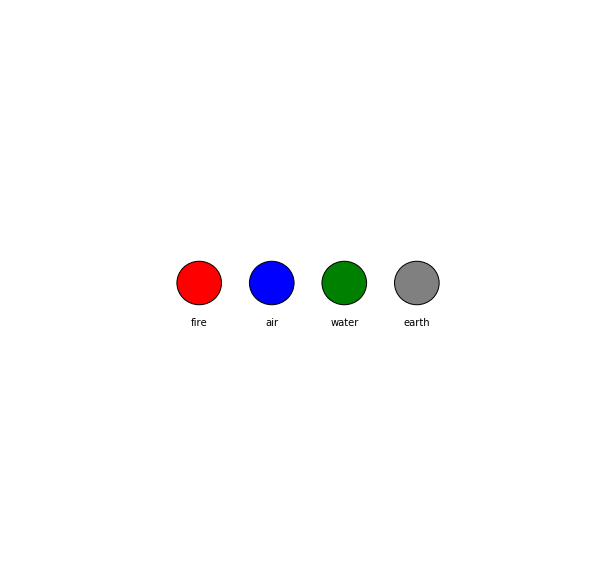

In [116]:
# Leon Battista Alberti
# four true colors: red (fire), blue (air), green (water), grey and ash (earth)

s = 10  # figsize
x = x*.3  # x location
r = 0.04  # radius
fig, ax = plt.subplots(figsize=(s, s))

colors = ['red', 'blue', 'green', 'grey']
labels = ['fire', 'air', 'water', 'earth']

for i, c in enumerate(colors):
    ax.add_artist(plt.Circle((x, .5), r, facecolor=c, edgecolor='black'))
    ax.annotate(labels[i], (x, .42), ha='center')
    x+=.13  #shift x location

plt.axis('off')
plt.show()

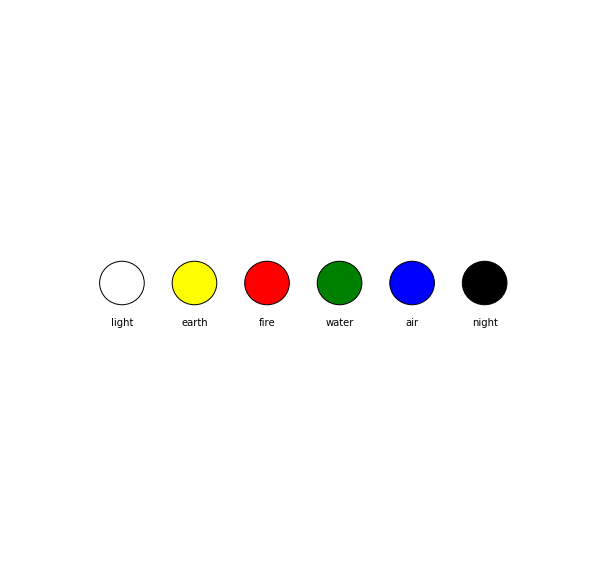

In [117]:
# Leonardo da Vinci
# Six colors: black (night), blue (air), green (water), red (fire), yellow (earth), white (light)

s = 10  # figsize
x = x*.2  # x location
r = 0.04  # radius
fig, ax = plt.subplots(figsize=(s, s))

colors = ['white', 'yellow', 'red', 'green', 'blue', 'black']
labels = ['light', 'earth',  'fire', 'water', 'air', 'night']

for i, c in enumerate(colors):
    ax.add_artist(plt.Circle((x, .5), r, facecolor=c, edgecolor='black'))
    ax.annotate(labels[i], (x, .42), ha='center')
    x+=.13  #shift x location

plt.axis('off')
plt.show()

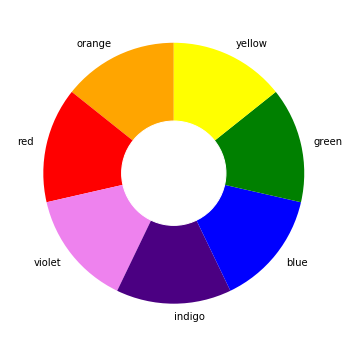

In [113]:
# netwon color wheel
# https://python-graph-gallery.com/161-custom-matplotlib-donut-plot/
s = 6
plt.figure(figsize=(s,s))

colors = ['orange', 'red', 'violet', 'indigo', 'blue', 'green', 'yellow']

size=[1, 1, 1, 1, 1, 1, 1]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.4, color='white')

plt.pie(size, labels=colors, colors=colors, startangle=90)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [1]:
import pandas as pd

# define 8 diverging colors for every energy type using colorbrewer
# http://colorbrewer2.org/#type=diverging&scheme=BrBG&n=8
energy_colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#c7eae5', '#80cdc1', '#35978f', '#01665e']

# read energy data file using pandas
df = pd.read_excel('data/energiebilanz2017.xlsx', 
                   #sheet_name='Energiebilanz2017',
                   sheet_name='EnergyBalance2017',
                   skiprows=17).iloc[:, :8]

df

,Energy balance of Germany 2017 T Joule,Hard coals,Brown coals,Mineral Oils,Gas,Renewable Energy,Other Energy Sources,Electricity and Nuclear Power
0,Production,107966,1539800,94245,254216,1820399,234637,0
1,Import,1410938,643,5601377,4019182,34659,0,932911
2,Inventory Withdrawal,0,80,62949,22456,0,0,0
3,Energy Volume,1518904,1540523,5758569,4295854,1855058,234637,932911
4,Export,30852,32100,975071,1129268,57599,0,289265
5,Marine Bunkers,0,0,95681,0,0,0,0
6,Inventory Restocking,-14000,1127,16501,0,0,0,0
7,Primary Consumption,1502051,1507296,4671315,3166586,1797459,234637,643647


In [2]:
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

links = []
category_names = df.iloc[:, 0]

# helper function for creatin a link for the Sankey chart
def create_link(source, target, value, t, color):
    return {"source": source, "target": target, "value": value, "type": t, "color": color}

# iterate over DataFrame columns (energy types)
for i, column in enumerate(df.iloc[:, 1:]):
    
    # get column values as Series and column name
    values = df[column]  # categories: production, import, consumption, export
    t = values.name
    
    # create links
    # rows 0 (production), 1 (import), 2 (inventory) --> row 3 (energy volume)
    links.append(create_link(category_names[0], t, values[0], t, energy_colors[i]))
    links.append(create_link(category_names[1], t, values[1], t, energy_colors[i]))
    links.append(create_link(category_names[2], t, values[2], t, energy_colors[i]))
    
    # row 3 --> row 4 (export), 5 (bunkers), 6 (inventory), 7 (consumption)
    links.append(create_link(t, category_names[4], values[4], t, energy_colors[i]))
    links.append(create_link(t, category_names[5], values[5], t, energy_colors[i]))
    links.append(create_link(t, category_names[6], values[6], t, energy_colors[i]))
    links.append(create_link(t, category_names[7], values[7], t, energy_colors[i]))
    

w = SankeyWidget(links=links,
                 layout = Layout(width="800", height="400"),
                 margins=dict(top=0, bottom=0, left=150, right=170))

print("German Energy Balance 2017 (data from https://ag-energiebilanzen.de/7-0-Bilanzen-1990-2017.html)")
w

German Energy Balance 2017 (data from https://ag-energiebilanzen.de/7-0-Bilanzen-1990-2017.html)


SankeyWidget(layout=Layout(height='400', width='800'), links=[{'source': 'Production', 'target': 'Hard coals',…